In [6]:
from multiplicative_weights_sim import generate_agents, start_multiprocess_sim, Agent, Tolerance, sim
from generate_opinions import *
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
import random
from pickle_utils import save_agents
import itertools

In [7]:
num_agents = 1000

saved_opinions = pd.read_csv('constants/opinions.csv', index_col=0)
opinions = saved_opinions['0'].to_list()

# Creating agents with different distributions of opinions
# all_agents = []
# for percent_low in [0.9, 0.7, 0.5, 0.3, 0.1]:
#     num_extra_low = int(num_agents*percent_low)
#     num_same = int(num_agents*(1-percent_low)/2)
#     num_high = num_agents - num_extra_low - num_same
    
#     print(percent_low)
#     print(num_extra_low, num_same, num_high)
    
#     weights = []

#     for i in range(0, num_extra_low):
#         weights.append(np.array([4, 1, 1]))

#     for i in range(0, num_same):
#         weights.append(np.array([1, 4, 1]))

#     for i in range(0, num_high):
#         weights.append(np.array([1, 1, 4]))

#     random.shuffle(weights)
#     agents = generate_agents(opinions, weights)
#     all_agents.append((percent_low, agents))
proportions = np.arange(0, 1.1, 0.2)  # Steps of 10%
all_agents = []
for prop_low, prop_same in itertools.product(proportions, repeat=2):
    prop_high = 1 - prop_low - prop_same
    if prop_high >= 0:  # Ensure we have a valid proportion
        num_low = int(num_agents * prop_low)
        num_same = int(num_agents * prop_same)
        num_high = num_agents - num_low - num_same

        # Generate weights based on the proportions
        weights = ([np.array([4, 1, 1])] * num_low +
                   [np.array([1, 4, 1])] * num_same +
                   [np.array([1, 1, 4])] * num_high)
        random.shuffle(weights)  # Shuffle to randomize agent order

        # Generate agents and store the configuration with the group
        agents = generate_agents(opinions, weights)
        all_agents.append((prop_low, prop_same, prop_high, agents))

    
# weights = [np.array([1, 1, 1]) for _ in range(num_agents)]
# agents = generate_agents(opinions, weights)
# all_agents.append((0, agents))
print(len(all_agents))

18


In [ ]:
for i, (prop_low, prop_same, prop_high, agents) in enumerate(all_agents):
    print(f"low: {prop_low}, same: {prop_same}, high: {prop_high}")

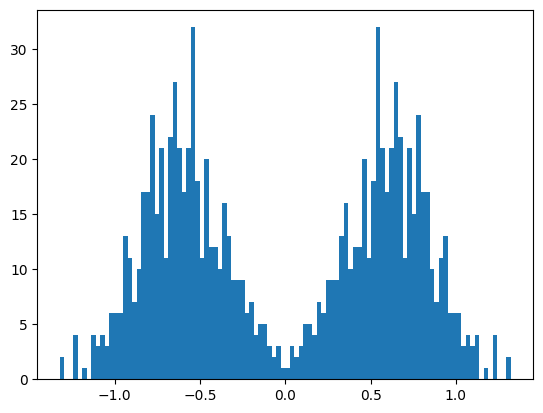

In [3]:
plt.hist(opinions, bins=100)
plt.show()

In [4]:
all_agents_post_sim = start_multiprocess_sim(all_agents)

Simulating low percent: 0.0, med percent: 0.1 high percent: 0.9
Simulating low percent: 0.0, med percent: 0.0 high percent: 1.0
Simulating low percent: 0.0, med percent: 0.2 high percent: 0.8
Simulating low percent: 0.0, med percent: 0.30000000000000004 high percent: 0.7
Simulating low percent: 0.0, med percent: 0.4 high percent: 0.6
Simulating low percent: 0.0, med percent: 0.5 high percent: 0.5
Simulating low percent: 0.0, med percent: 0.6000000000000001 high percent: 0.3999999999999999
Simulating low percent: 0.0, med percent: 0.7000000000000001 high percent: 0.29999999999999993
Simulating low percent: 0.0, med percent: 0.8 high percent: 0.19999999999999996
Simulating low percent: 0.0, med percent: 1.0 high percent: 0.0
Simulating low percent: 0.1, med percent: 0.0 high percent: 0.9
Simulating low percent: 0.0, med percent: 0.9 high percent: 0.09999999999999998
Simulating low percent: 0.1, med percent: 0.2 high percent: 0.7
Simulating low percent: 0.1, med percent: 0.1 high percent:

In [16]:
# all_agents_post_sim = []
# for percent_low, agents in all_agents:
#     print(f"simulating low preference percent {percent_low}")
#     num_iterations = 1000
#     learning_rate = 0.1
#     all_agents_post_sim.append((percent_low, sim(agents, num_iterations, learning_rate)))

simulating low preference percent 0.9
iterations: 0 - 100 took 17.179112911224365 seconds
iterations: 100 - 200 took 16.43026614189148 seconds
iterations: 200 - 300 took 17.688273191452026 seconds
iterations: 300 - 400 took 17.47751021385193 seconds
iterations: 400 - 500 took 16.01121425628662 seconds
iterations: 500 - 600 took 18.65367102622986 seconds
iterations: 600 - 700 took 18.825345039367676 seconds
iterations: 700 - 800 took 19.16001296043396 seconds
iterations: 800 - 900 took 17.32984495162964 seconds
total sim time: 177.0339639186859
simulating low preference percent 0.8
iterations: 0 - 100 took 17.358619213104248 seconds
iterations: 100 - 200 took 17.482038021087646 seconds
iterations: 200 - 300 took 17.02517795562744 seconds
iterations: 300 - 400 took 16.440105199813843 seconds
iterations: 400 - 500 took 16.664769172668457 seconds
iterations: 500 - 600 took 16.972515106201172 seconds
iterations: 600 - 700 took 17.611331701278687 seconds
iterations: 700 - 800 took 17.7171199

In [6]:
import pickle
def save_agents(agents, filename):
    filename = "../saved_sim_runs/" + filename + ".pkl"
    with open(filename, "wb") as file:
        pickle.dump(agents, file)

In [7]:
for percent_low, agents in all_agents_post_sim:
    save_agents(agents, f"balanced_10k_iterations_sim_loss_history")

In [18]:
1551.1621100902557/60

25.852701834837596

In [21]:
import time
time.time_ns()

1713247552212085000